In [5]:
import pandas as pd
import numpy as np

In [6]:
#loading the dataset and describing it

In [7]:
data = pd.read_csv("Dataset/Housing.csv")

data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [8]:
data.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
furnishingstatus    object
dtype: object

In [9]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,furnished


In [10]:
#performing visualization

#1. Univariate analysis

In [11]:
import matplotlib.pyplot as plt
import seaborn as sb

<Axes: xlabel='mainroad', ylabel='count'>

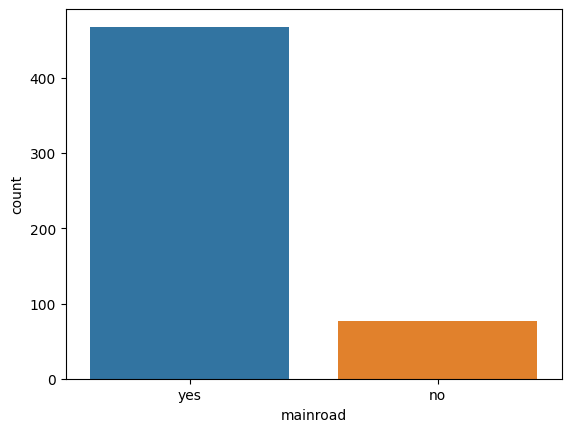

In [12]:
sb.countplot(x=data["mainroad"])

<Axes: xlabel='guestroom', ylabel='count'>

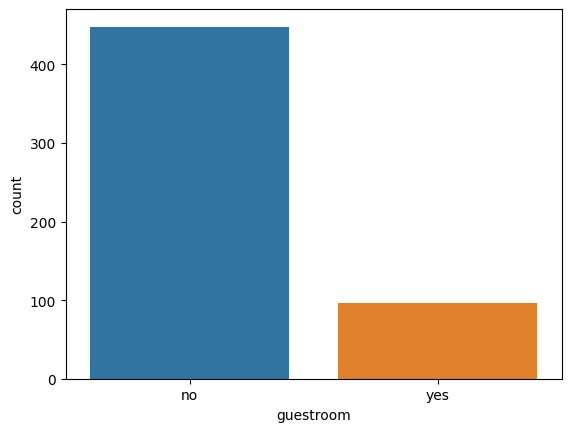

In [13]:
sb.countplot(x=data["guestroom"])

<Axes: xlabel='basement', ylabel='count'>

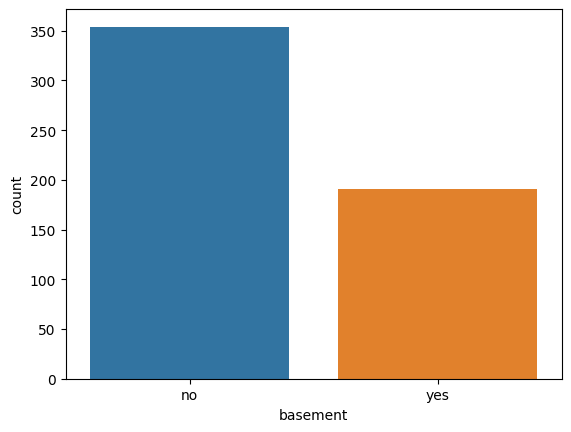

In [14]:
sb.countplot(x=data["basement"])

<Axes: xlabel='hotwaterheating', ylabel='count'>

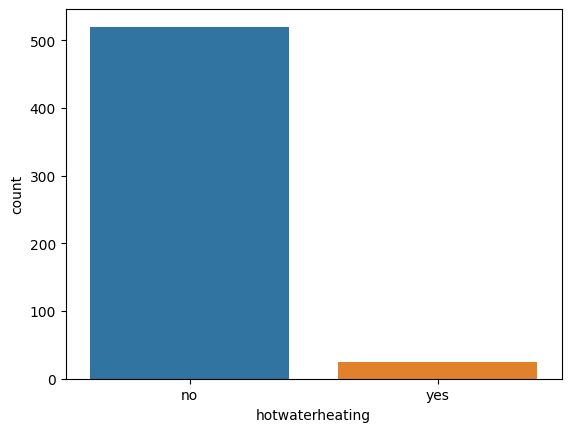

In [15]:
sb.countplot(x=data["hotwaterheating"])

<Axes: xlabel='airconditioning', ylabel='count'>

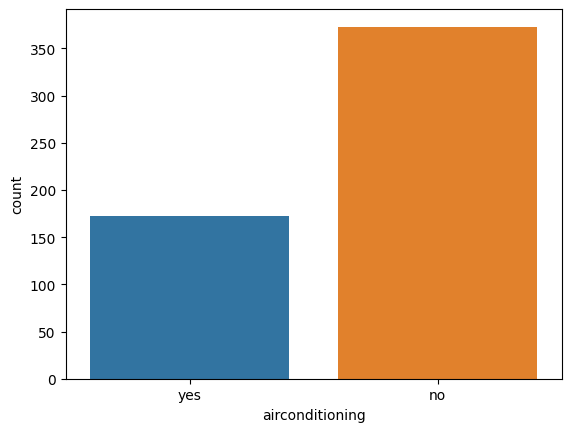

In [16]:
sb.countplot(x=data["airconditioning"])

<Axes: xlabel='furnishingstatus', ylabel='count'>

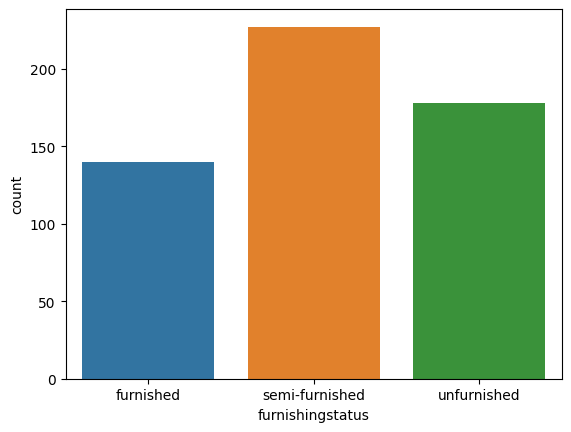

In [17]:
sb.countplot(x=data["furnishingstatus"])

In [18]:
#2. Bivariate analysis

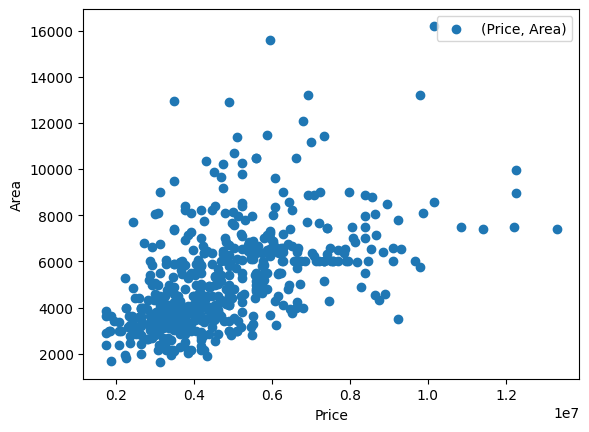

In [19]:
x = data["price"]
y = data["area"]


plt.scatter(x,y,label="(Price, Area)")
plt.xlabel("Price")
plt.ylabel("Area")



plt.legend()
plt.show()

In [20]:
#multivariate analysis

In [21]:
data["xmainroad"] =[0 if x=="yes" else 1 for x in data["mainroad"]]
data["xairconditioning"] =[0 if x=="yes" else 1 for x in data["airconditioning"]]
data["xbasement"] =[0 if x=="yes" else 1 for x in data["basement"]]
data["xguestroom"] =[0 if x=="yes" else 1 for x in data["guestroom"]]

In [22]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus,xmainroad,xairconditioning,xbasement,xguestroom
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,furnished,0,0,1,1
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,furnished,0,0,1,1
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished,0,1,0,1
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,furnished,0,0,0,1
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,furnished,0,0,0,0


<Axes: >

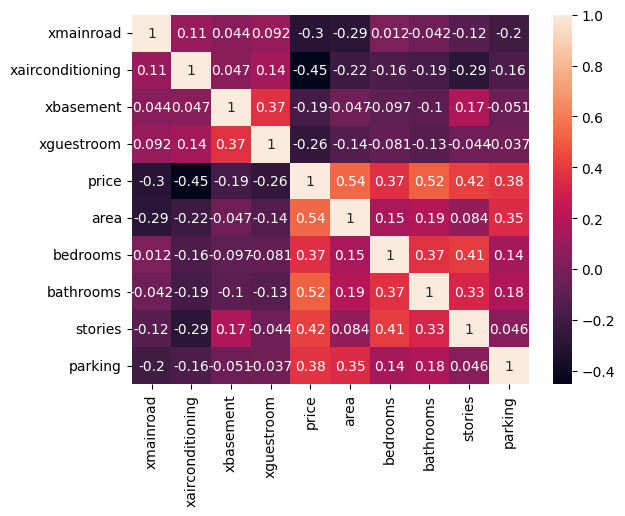

In [23]:
sb.heatmap(data[["xmainroad", "xairconditioning", "xbasement", "xguestroom", "price", "area", "bedrooms", "bathrooms", "stories", "parking"]].corr(),annot=True)

In [24]:
#4. Perform descriptive statistics on the dataset.

In [25]:

obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))
 
int_ = (data.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))
 
fl = (data.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

Categorical variables: 6
Integer variables: 0
Float variables: 0


In [26]:
#5 dealing with missing data
#6. Find the outliers and replace them outliers

In [27]:
for x in data:
    data[x].fillna(0)

In [28]:
#10. Split the data into training and testing

In [33]:

from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
 
X = data[["xmainroad", "xairconditioning", "xbasement", "xguestroom", "price", "area", "bedrooms", "bathrooms", "stories", "parking"]]
Y = data['price']
 
# Split the training set into
# training and validation set
X_train, X_valid, Y_train, Y_valid = train_test_split(
    X, Y, train_size=0.8, test_size=0.2, random_state=0)

In [31]:
#11. Build the Model

In [34]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error

model_SVR = svm.SVR()
model_SVR.fit(X_train,Y_train)
Y_pred = model_SVR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid, Y_pred))


0.2710023664903341


In [35]:
from sklearn.ensemble import RandomForestRegressor

model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train, Y_train)
Y_pred = model_RFR.predict(X_valid)

mean_absolute_percentage_error(Y_valid, Y_pred)


0.0027048049452306475

In [37]:
#Linear regression highest accuracy

In [36]:
from sklearn.linear_model import LinearRegression

model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred = model_LR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid, Y_pred))


3.13461197333365e-16


In [ ]:
#->linear model giving highest accuracy